Certainly! Applying the **Concept Distillation framework** to a **style transfer** framework offers an exciting opportunity to control and enhance the style transfer process by integrating human-centered concepts directly into the model training. Below, I will provide insights on how this integration can be achieved, drawing inspiration from both the **Concept Distillation** framework and the **Linear Style Transfer** methods we discussed earlier.

---

## **1. Understanding the Core Components**

### **Concept Distillation Framework Recap**

- **Objective:** To sensitize or desensitize a model to specific human-defined concepts without changing its architecture.
- **Key Components:**
  - **Concept Loss (\( L_C \))**: Adjusts the model's sensitivity to specific concepts.
  - **Prototypes:** Capture global class characteristics for better generalization.
  - **Teacher-Student Framework:** Uses a pretrained teacher model to distill richer concept representations into the student model.
  
### **Linear Style Transfer Recap**

- **Objective:** To perform fast, arbitrary style transfer by aligning the statistical properties of content and style images in feature space using linear transformations.
- **Key Components:**
  - **Feature Extraction:** Using a pretrained CNN (e.g., VGG-19) to extract content and style features.
  - **Linear Transformation:** Aligning mean and covariance of content features to match those of style features.
  - **Decoder Network:** Reconstructing the stylized image from the transformed features.

---

## **2. Mapping Concepts to Style Transfer**

To control style transfer using the Concept Distillation framework, we can treat **styles as concepts** and apply concept sensitization or desensitization to influence how much of a particular style is transferred to the content image.

### **Defining Concepts in Style Transfer**

- **Style Concepts (\( C_{\text{style}} \))**: Features or patterns characteristic of the style image (e.g., brush strokes, color palettes).
- **Content Concepts (\( C_{\text{content}} \))**: Structural features of the content image (e.g., edges, shapes).
- **Negative Concepts (\( C' \))**: Elements we want to minimize in the stylization (e.g., artifacts, unwanted textures).

---

## **3. Integrating Concept Distillation into Style Transfer**

### **3.1. Teacher-Student Framework**

- **Teacher Model:**
  - A large, pretrained network that has a rich understanding of various styles (e.g., a model trained on a large dataset of artistic images).
  - Provides high-quality style representations.
- **Student Model:**
  - The style transfer model we aim to fine-tune for controlled stylization.
  - Learns to replicate or adjust style concepts as guided by the teacher.

### **3.2. Concept Loss in Style Transfer**

- **Objective:** To adjust the student's output to align with desired style concepts.
- **Implementation:**
  - **Compute Concept Loss (\( L_C \))** between the student's generated image and the style concepts extracted from the teacher.
  - **Minimize \( L_C \)** to sensitize the model to desired style features.
  - **Adjust \( L_C \)** to desensitize the model from overemphasized or unwanted style elements.

### **3.3. Prototypes for Style Features**

- **Role of Prototypes:**
  - Capture global style characteristics (e.g., common patterns across different artworks of the same style).
  - Enhance the model's ability to generalize style transfer across various images.
- **Implementation:**
  - **Cluster Style Features:** Use K-means clustering on style features extracted from multiple style images to create prototypes.
  - **Use in Loss Computation:** Incorporate the distance between the student's output features and the style prototypes into the loss function.

---

## **4. Practical Steps to Apply the Framework**

### **Step 1: Preprocess and Extract Features**

- **Content and Style Feature Extraction:**
  - Use a pretrained CNN to extract features from content and style images at selected layers.
  - Identify layers where style concepts are most pronounced.

### **Step 2: Define Concepts and Prototypes**

- **Select Style Concepts (\( C_{\text{style}} \)):**
  - Define the style features you wish to emphasize (e.g., color distribution, texture patterns).
- **Create Style Prototypes:**
  - Collect a set of style images representing the desired style.
  - Cluster their features to form prototypes.

### **Step 3: Train the Mapping Module**

- **Map Teacher Activations to Student Space:**
  - Train an autoencoder to map the teacher's style feature space to the student's.
  - Ensures compatibility of style representations between models.

### **Step 4: Compute Concept Activation Vectors (CAVs)**

- **Learn CAVs for Style Concepts:**
  - Train a linear classifier to distinguish between style concepts (\( C_{\text{style}} \)) and negative concepts (\( C' \)).
  - Obtain CAVs as the normal vectors to the decision boundaries.

### **Step 5: Integrate Concept Loss into Training**

- **Define the Total Loss:**
  - \( L_{\text{total}} = L_{\text{style}} + L_{\text{content}} + \lambda L_C \)
    - **\( L_{\text{style}} \):** Original style loss measuring the difference between style features of the generated image and the style image.
    - **\( L_{\text{content}} \):** Original content loss ensuring content preservation.
    - **\( L_C \):** Concept loss adjusting sensitivity to style concepts.
    - **\( \lambda \):** Hyperparameter controlling the influence of \( L_C \).

- **Train the Student Model:**
  - Fine-tune the model using the total loss, adjusting \( \lambda \) to control the degree of style transfer.

---

## **5. Controlling Style Transfer**

### **5.1. Sensitizing to Specific Styles**

- **Increase \( \lambda \) for Desired Style Concepts:**
  - Enhances the presence of certain style elements in the output.
- **Use Multiple Style Concepts:**
  - Combine CAVs from different styles to create hybrid stylizations.

### **5.2. Desensitizing from Unwanted Elements**

- **Negative Concepts (\( C' \)):**
  - Define features you want to minimize (e.g., excessive texture, noise).
- **Adjust Concept Loss Accordingly:**
  - Modify \( L_C \) to penalize alignment with negative concepts.

---

## **6. Extending to Video Style Transfer**

- **Temporal Consistency:**
  - Incorporate temporal constraints to ensure smooth transitions between frames.
- **Consistent Concepts Across Frames:**
  - Use the same style concepts and prototypes for all frames.
- **Optical Flow for Alignment:**
  - Utilize optical flow to align features between consecutive frames before applying the concept loss.

---

## **7. Potential Benefits**

- **Enhanced Control:**
  - Fine-grained adjustment of style elements in the output.
- **Improved Stylization Quality:**
  - Better preservation of content structures and desired style characteristics.
- **Flexibility:**
  - Ability to apply arbitrary styles without retraining the entire model.
- **Efficiency:**
  - Linear transformations and concept loss computations are efficient, supporting real-time applications.

---

## **8. Example Use Case**

- **Objective:** Transfer the style of Vincent van Gogh's "Starry Night" to a photograph while controlling the intensity of the swirling patterns.
- **Implementation:**
  - **Define Style Concept:** Swirling brush strokes characteristic of "Starry Night."
  - **Extract Style Features:** Use multiple Van Gogh paintings to create style prototypes emphasizing swirling patterns.
  - **Compute CAVs:** Obtain CAVs representing the swirling pattern concept.
  - **Adjust \( \lambda \):** Increase to enhance swirling patterns, or decrease to subdue them.
- **Result:**
  - Controlled stylization where the intensity of the swirling patterns can be adjusted as desired.

---

## **9. Challenges and Considerations**

- **Selection of Concepts:**
  - Requires careful definition of style concepts that are meaningful and can be captured by the model.
- **Balancing Loss Terms:**
  - Tuning hyperparameters like \( \lambda \) is crucial to achieve the desired balance between style and content.
- **Computational Resources:**
  - Although efficient, additional computations for concept loss and prototypes may require optimization for real-time performance.

---

## **10. Conclusion**

By integrating the Concept Distillation framework into a style transfer model, we can achieve controlled stylization that aligns with human-defined style concepts. This approach allows for:

- **Fine-Grained Control:** Adjusting the presence of specific style elements.
- **Enhanced Interpretability:** Understanding how style concepts influence the output.
- **Flexibility and Efficiency:** Applying arbitrary styles without significant computational overhead.

This fusion of concepts provides a powerful tool for artists, designers, and researchers to create stylized content that meets specific aesthetic criteria while maintaining the efficiency needed for practical applications.

---

**Further Exploration:**

- **Experiment with Different Concepts:** Try defining concepts based on color palettes, geometric patterns, or artistic techniques.
- **Combine Multiple Styles:** Use concept blending to create unique stylizations by combining concepts from different styles.
- **User Interaction:** Develop interfaces that allow users to adjust \( \lambda \) or select concepts dynamically for interactive style transfer.

---

**I hope this provides a clear insight into how the Concept Distillation framework can be applied to control style transfer in images and videos. If you have any questions or need further clarification on any aspect, feel free to ask!**


c:\Users\sunay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


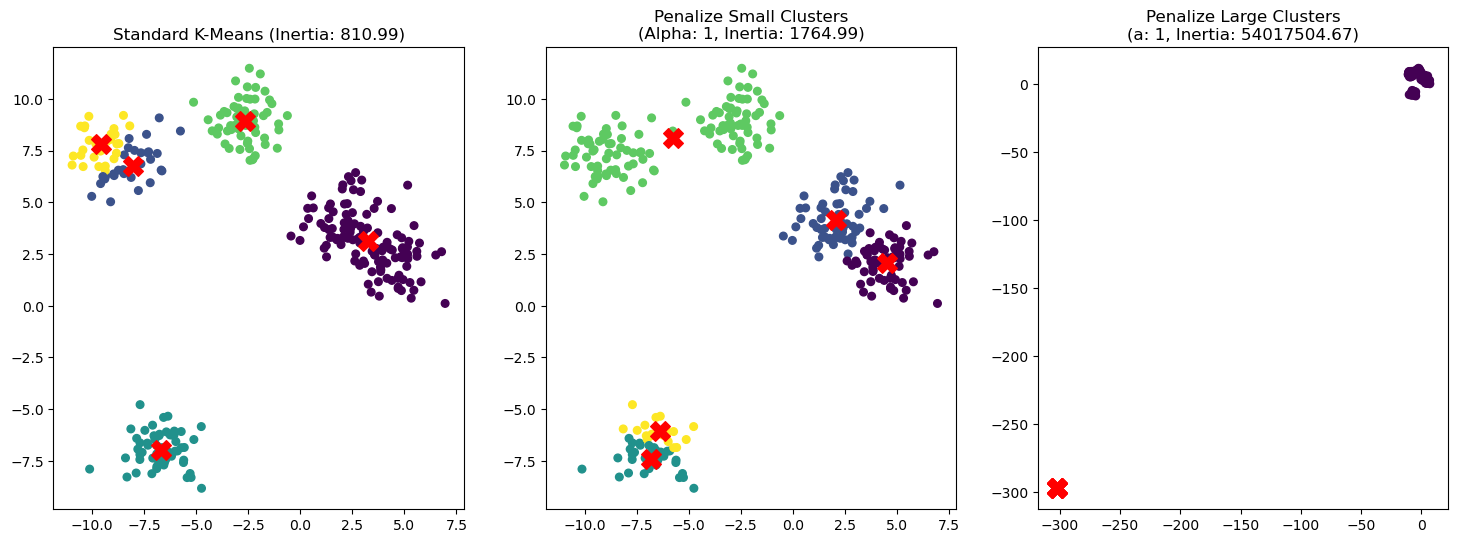

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate some sample data
X, _ = make_blobs(n_samples=300, centers=5, random_state=42)

# Penalized KMeans implementation for both penalty types
class PenalizedKMeans:
    def __init__(self, n_clusters=5, alpha=1.0, a=1.0, penalty_type="small_clusters", max_iter=300):
        self.n_clusters = n_clusters
        self.alpha = alpha  # Strength of small cluster penalty
        self.a = a  # Strength of large cluster penalty
        self.penalty_type = penalty_type  # "small_clusters" or "large_clusters"
        self.max_iter = max_iter
    
    def fit(self, X):
        # Initialize cluster centers randomly
        np.random.seed(42)
        random_indices = np.random.permutation(X.shape[0])[:self.n_clusters]
        self.centroids = X[random_indices]
        
        for i in range(self.max_iter):
            # Assign each data point to the nearest centroid
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            self.labels = np.argmin(distances, axis=1)
            
            # Update centroids
            new_centroids = np.array([X[self.labels == j].mean(axis=0) if len(X[self.labels == j]) > 0 else self.centroids[j] for j in range(self.n_clusters)])
            
            # Apply penalty based on cluster size
            cluster_sizes = np.bincount(self.labels, minlength=self.n_clusters)
            for j in range(self.n_clusters):
                if cluster_sizes[j] > 0:
                    if self.penalty_type == "small_clusters":
                        # Penalize small clusters: alpha / n_k
                        new_centroids[j] += self.alpha * (1.0 / cluster_sizes[j])
                    elif self.penalty_type == "large_clusters":
                        # Penalize large clusters: a * n_k
                        new_centroids[j] -= self.a * cluster_sizes[j]
            
            # Check for convergence
            if np.allclose(self.centroids, new_centroids):
                break
            
            self.centroids = new_centroids
        
        # Calculate inertia (cost)
        self.inertia_ = np.sum([np.linalg.norm(X[self.labels == j] - self.centroids[j]) ** 2 for j in range(self.n_clusters)])
    
    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

# Parameters
n_clusters = 5
alpha = 1  # Strength of small cluster penalty
a = 1     # Strength of large cluster penalty

# Run KMeans with penalty for small clusters
penalized_kmeans_small = PenalizedKMeans(n_clusters=n_clusters, alpha=alpha, penalty_type="small_clusters")
penalized_kmeans_small.fit(X)

# Run KMeans with penalty for large clusters
penalized_kmeans_large = PenalizedKMeans(n_clusters=n_clusters, a=a, penalty_type="large_clusters")
penalized_kmeans_large.fit(X)

# Run standard K-Means for comparison
kmeans_standard = KMeans(n_clusters=n_clusters, random_state=42).fit(X)

# Plot results
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot standard K-Means
ax[0].scatter(X[:, 0], X[:, 1], c=kmeans_standard.labels_, s=30, cmap='viridis')
ax[0].scatter(kmeans_standard.cluster_centers_[:, 0], kmeans_standard.cluster_centers_[:, 1], s=200, c='red', marker='X')
ax[0].set_title(f'Standard K-Means (Inertia: {kmeans_standard.inertia_:.2f})')

# Plot penalized K-Means for small clusters
ax[1].scatter(X[:, 0], X[:, 1], c=penalized_kmeans_small.labels, s=30, cmap='viridis')
ax[1].scatter(penalized_kmeans_small.centroids[:, 0], penalized_kmeans_small.centroids[:, 1], s=200, c='red', marker='X')
ax[1].set_title(f'Penalize Small Clusters\n(Alpha: {alpha}, Inertia: {penalized_kmeans_small.inertia_:.2f})')

# Plot penalized K-Means for large clusters
ax[2].scatter(X[:, 0], X[:, 1], c=penalized_kmeans_large.labels, s=30, cmap='viridis')
ax[2].scatter(penalized_kmeans_large.centroids[:, 0], penalized_kmeans_large.centroids[:, 1], s=200, c='red', marker='X')
ax[2].set_title(f'Penalize Large Clusters\n(a: {a}, Inertia: {penalized_kmeans_large.inertia_:.2f})')

plt.show()
